In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-digit-identification-with-dt-b2/sample_submission.csv
/kaggle/input/handwritten-digit-identification-with-dt-b2/train.csv
/kaggle/input/handwritten-digit-identification-with-dt-b2/test.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/handwritten-digit-identification-with-dt-b2/train.csv")
train_data

,1,0,0.1,3,11,16,15,0.2,0.3,0.4,...,0.24,0.25,0.26,3.1,15.3,16.5,9.2,0.27,0.28,8.1
0,2,0,0,0,10,12,3,0,0,0,...,0,0,0,2,10,14,13,4,0,8
1,3,0,0,3,10,15,8,0,0,0,...,0,0,0,2,10,8,0,0,0,5
2,4,0,0,5,11,16,16,8,0,0,...,0,0,0,7,16,11,2,0,0,3
3,5,0,0,4,12,16,16,4,0,0,...,0,0,0,3,12,13,9,0,0,2
4,6,0,1,11,13,2,0,0,0,0,...,0,0,1,12,12,12,15,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1426,0,0,0,1,7,14,14,0,0,...,0,0,0,0,0,7,12,0,0,9
1425,1427,0,0,6,14,10,0,0,0,0,...,0,0,0,9,15,8,0,0,0,3
1426,1428,0,0,8,16,15,6,0,0,0,...,0,0,0,8,15,16,14,1,0,8
1427,1429,0,0,2,16,13,1,0,0,0,...,0,0,0,4,11,15,16,10,0,2


In [3]:
col=[i for i in range(0,66)]
train_data=pd.read_csv("/kaggle/input/handwritten-digit-identification-with-dt-b2/train.csv",names=col)
train_data

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1,0,0,3,11,16,15,0,0,0,...,0,0,0,3,15,16,9,0,0,8
1,2,0,0,0,10,12,3,0,0,0,...,0,0,0,2,10,14,13,4,0,8
2,3,0,0,3,10,15,8,0,0,0,...,0,0,0,2,10,8,0,0,0,5
3,4,0,0,5,11,16,16,8,0,0,...,0,0,0,7,16,11,2,0,0,3
4,5,0,0,4,12,16,16,4,0,0,...,0,0,0,3,12,13,9,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,0,0,0,1,7,14,14,0,0,...,0,0,0,0,0,7,12,0,0,9
1426,1427,0,0,6,14,10,0,0,0,0,...,0,0,0,9,15,8,0,0,0,3
1427,1428,0,0,8,16,15,6,0,0,0,...,0,0,0,8,15,16,14,1,0,8
1428,1429,0,0,2,16,13,1,0,0,0,...,0,0,0,4,11,15,16,10,0,2


In [4]:
test_data=pd.read_csv("/kaggle/input/handwritten-digit-identification-with-dt-b2/test.csv",index_col=0,names=col[:64])
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1431,0,0,0,2,14,5,0,0,0,0,...,0,0,0,0,0,3,15,6,0,0
1432,0,0,0,13,12,0,0,0,0,0,...,12,0,0,0,1,10,16,14,4,0
1433,0,0,7,16,16,16,6,0,0,0,...,0,0,0,0,7,15,1,0,0,0
1434,0,2,15,15,6,0,0,0,0,0,...,1,0,0,3,15,14,11,2,0,0
1435,0,0,0,10,9,0,0,0,0,0,...,0,0,0,0,0,13,10,0,0,0


In [5]:
x=train_data.iloc[:,1:65]
y=train_data.iloc[:,65]
print(x.shape)
print(y.shape)

(1430, 64)
(1430,)


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
print("Modules imported!!")

Modules imported!!


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1001, 64)
(1001,)
(429, 64)
(429,)


In [8]:
clf = DecisionTreeClassifier(criterion="log_loss", max_depth=1429)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8694638694638694


In [9]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=30)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8764568764568764


In [10]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8624708624708625


In [11]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth= 1429)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8764568764568764


In [12]:
param_d={
    "criterion":["gini","entropy"],
    "max_depth":[i for i in range(1,30)]
}

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid = param_d ,cv=5,n_jobs =-1)

In [14]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=1429),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29]})

In [15]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=29)

In [16]:
grid.best_score_

0.8261691542288556

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=52626c3d1a7d4f9f3c32e3ddb603cb2b96dbe1c9c4a2d6799dbec8ead6112a1f
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


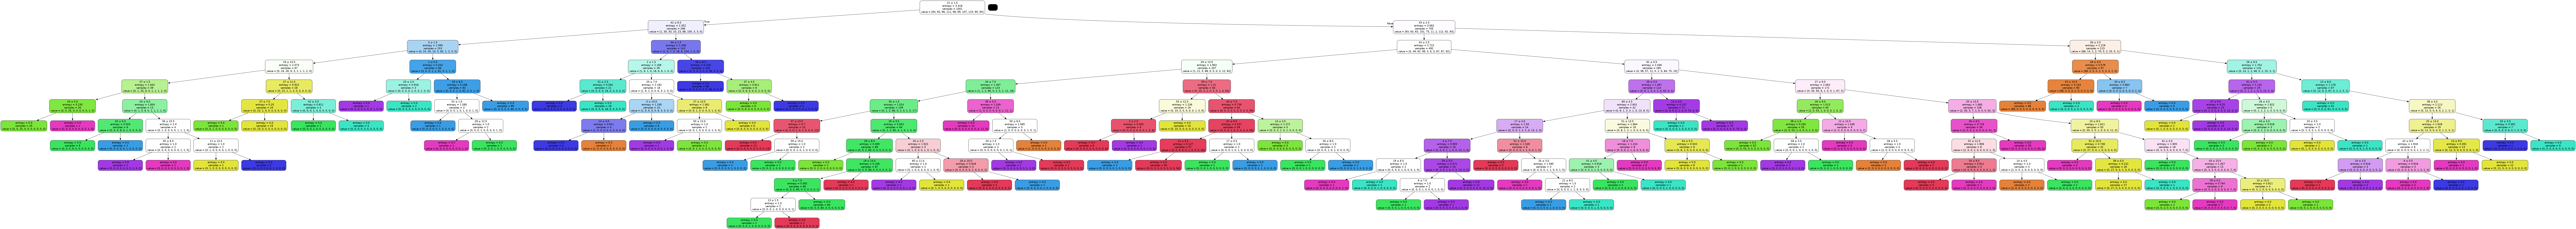

In [19]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col[:64])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pic.png')
Image(graph.create_png())


In [20]:
clf.tree_.max_depth

11

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=17)
clf = clf.fit(x,y)
my_pred = clf.predict(test_data)

In [22]:
final_sub = pd.DataFrame({'ID': test_data.index, 'Category': my_pred})
final_sub.to_csv('sample_submission.csv',index=False)
print("Your submission was successfully saved!")
final_sub

Your submission was successfully saved!


,ID,Category
0,1431,4
1,1432,6
2,1433,5
3,1434,9
4,1435,5
...,...,...
362,1793,4
363,1794,6
364,1795,0
365,1796,6
